In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
a = tf.placeholder(dtype=tf.int16)
b = tf.placeholder(dtype=tf.int16)

In [32]:
init = tf.global_variables_initializer()

c = a+b

with tf.Session() as sess:
    s = c.eval(feed_dict={
        a:[10,2,0],
        b:[1,2,3],
    })
    
s

array([11,  4,  3], dtype=int16)

### Vanilla Neural Network

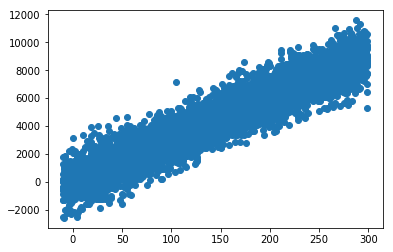

In [87]:
X = np.random.randint(-10,300,5000)
Y = X * 30 + 7 + np.random.normal(100,1000,size=5000)

plt.scatter(X,Y)

In [177]:
learning_rate = 0.1
epochs = 10
batch_size = 100

x = tf.placeholder(tf.float32,shape=[None,1],name="Feature")
y = tf.placeholder(tf.float32,shape=[None,1],name="Label")

weight = tf.Variable(tf.random_normal([1,10],stddev=0.2),name="Weight")
bias = tf.Variable(tf.random_normal([10]),name="Bias")

weight_out = tf.Variable(tf.random_normal([10,1],stddev=0.2),name="Weight_out")
bias_out = tf.Variable(tf.random_normal([1]),name="Bias_out")


hidden = tf.nn.relu(
        tf.add(
            tf.matmul(
                x,weight
            ),
        bias
    )
)

y_ = tf.add(
    tf.matmul(
        hidden,weight_out
    ),
    bias_out
)

loss = tf.reduce_mean(y-y_)
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    total_batch = int(len(X)/batch_size)
    for epoch in range(epochs):
        print (y_.eval(feed_dict={x:X[:1].reshape(-1,1)}))
        if epoch%10:
#             print (y_.eval(feed_dict={x:X.reshape(-1,1)}))
            pass
        for i in range(total_batch):
            batch_index = np.random.randint(1,len(X))
            sess.run(optimiser,feed_dict={
                x:X[batch_index].reshape(-1,1),
                y:Y[batch_index].reshape(-1,1)
            })
    

[[14.421321]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
[[inf]]
